# Calculate extreme indices

In [5]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import seaborn as sns
import scipy.stats # to calculate correlation

In [6]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR
import Extreme_indices_functions as funcX
# import obs_functions as funcO

In [7]:
# define path where obs data is store
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [1]:
# set the [lat, lon] for each station - sourced from Google
adelaide = [-34.9285, 138.6007]
armidale = [-30.5036, 151.6523]
cape_otway = [-38.8340, 143.5241]
melbourne = [-37.8136, 144.9631]
sydney = [-33.8688, 151.2093]

In [2]:
# put the lat lon for station into an array
i = 0
stat_lat = [adelaide[i], armidale[i], cape_otway[i], melbourne[i], sydney[i]]
i=1
stat_lon = [adelaide[i], armidale[i], cape_otway[i], melbourne[i], sydney[i]]

In [3]:
# sete the text for each station to be displayed 
station_names = ['Adelaide', 'Armidale', 'Cape Otway', 'Melbourne', 'Sydney']

NameError: name 'land_Aus' is not defined

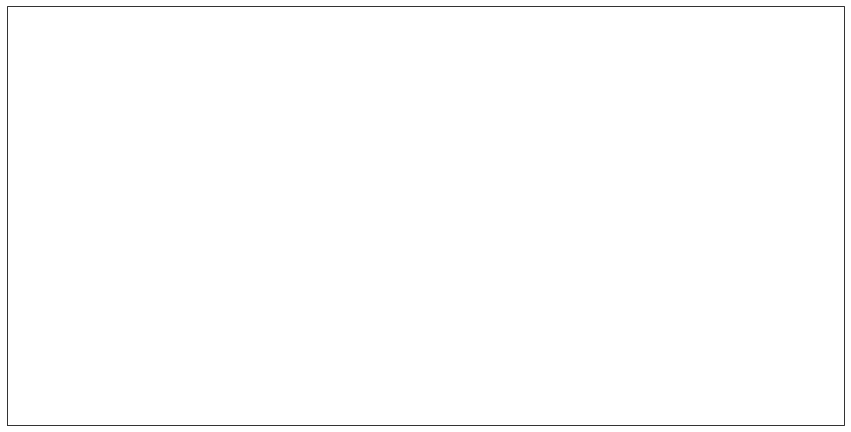

In [9]:
# example with grid lines
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
# set the axes to include australia
ax.set_extent([land_Aus.lon[0] - 2.5, land_Aus.lon[-1] + 2.5, land_Aus.lat[0] - 2.5, land_Aus.lat[-1] + 1], crs=ccrs.PlateCarree())

# ax.stock_img() # fills in colour for oceans and continents 
ax.coastlines(resolution='10m', color='k', lw=1)

# plot circle for each station location
for s, val in enumerate(stat_lat):
    plt.plot(stat_lon[s], stat_lat[s], 'o', color='crimson',markersize='8', transform=ccrs.PlateCarree()) # krakatoa

# move the text for each station
# adelaide
plt.text(stat_lon[0]+0.5, stat_lat[0], station_names[0], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())
#armidale
plt.text(stat_lon[1]-2.5, stat_lat[1]+0.5, station_names[1], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())
# cape otway
plt.text(stat_lon[2]-5.2, stat_lat[2]-0.8, station_names[2], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())
# melbourne
plt.text(stat_lon[3], stat_lat[3]+0.5, station_names[3], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())
#sydney
plt.text(stat_lon[4]+0.5, stat_lat[4], station_names[4], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())


# ax.gridlines(xlocs=range(-180,181,20), ylocs=range(-80,81,20),draw_labels=True)
# ax.gridlines(xlocs=range(-160,181,20), ylocs=range(-80,81,20),draw_labels=True)
# tropics = ax.gridlines(ylocs=[-23.43691,23.43691],draw_labels=True,linewidth=1,linestyle='--', edgecolor='darkgrey')
# tropics.xlines=False

# ax.text(0,-0.07,'Longitude', transform=ax.transAxes, ha='left')
# ax.text(-0.05,0,'Latitude', transform=ax.transAxes, rotation='vertical', va='bottom')
# plt.savefig('station_locations.png', dpi=300)